<a href="https://colab.research.google.com/github/Nandini-Shivappa/Covid_19_data_download_and_analysis-/blob/main/Covid19_data_download_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Introduction

The dataset used in this analysis is the "Compact COVID-19 Data" compiled by Our World in Data. This dataset aggregates a wide range of information related to the COVID-19 pandemic from various official sources, including the World Health Organization (WHO), national governments, and other research institutions.

The dataset contains daily time series data for numerous countries and territories worldwide. Key variables include:

*   **Case and Death Counts:** Total and new confirmed cases and deaths.
*   **Testing Data:** Total and new tests conducted.
*   **Vaccination Data:** Total vaccinations administered and people vaccinated.
*   **Population Metrics:** Population figures.
*   **Geographical Information:** Continent and country.
*   **Development Indicators:** Such as the Human Development Index (HDI).

The data is structured with each row representing a specific date and location (country/continent), providing a rich source for analyzing the progression of the pandemic and the effectiveness of different responses. While the dataset is extensive, it's important to note that data reporting can vary by country, potentially leading to inconsistencies or missing values for certain metrics and time periods.

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

In [ ]:
full_data=pd.read_csv("https://catalog.ourworldindata.org/garden/covid/latest/compact/compact.csv")

# Data Exploration

In [ ]:
full_data.shape

(501822, 61)

This data is quite huge. Containig 501822 rows and 61 columns.

In [ ]:
full_data.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [ ]:
full_data.head(10)

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
5,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
6,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
7,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
8,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN
9,Afghanistan,2020-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40578801.0,62.215477,16.752001,NaN,1516.273315,NaN,10.9,48.214695,0.39,NaN


In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501822 entries, 0 to 501821
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     501822 non-null  object 
 1   date                                        501822 non-null  object 
 2   total_cases                                 486795 non-null  float64
 3   new_cases                                   483980 non-null  float64
 4   new_cases_smoothed                          482764 non-null  float64
 5   total_cases_per_million                     486795 non-null  float64
 6   new_cases_per_million                       483980 non-null  float64
 7   new_cases_smoothed_per_million              482764 non-null  float64
 8   total_deaths                                486795 non-null  float64
 9   new_deaths                                  484741 non-null  float64
 

In [ ]:
full_data['date'] = pd.to_datetime(full_data['date'])

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501822 entries, 0 to 501821
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   country                                     501822 non-null  object        
 1   date                                        501822 non-null  datetime64[ns]
 2   total_cases                                 486795 non-null  float64       
 3   new_cases                                   483980 non-null  float64       
 4   new_cases_smoothed                          482764 non-null  float64       
 5   total_cases_per_million                     486795 non-null  float64       
 6   new_cases_per_million                       483980 non-null  float64       
 7   new_cases_smoothed_per_million              482764 non-null  float64       
 8   total_deaths                                486795 non-null  float64      

# Analysis

In [ ]:
# How many countries are there

full_data['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia excl. China',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England

In [ ]:
full_data['date'].max(), full_data['date'].min()

(Timestamp('2025-12-31 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [ ]:
pd.to_datetime('2020-12-31')

Timestamp('2020-12-31 00:00:00')

In [ ]:
## Filer the data for 2020,, 2021, 2022 and 2023

filter_data = full_data[full_data['date']<=pd.to_datetime('2023-12-31')]

In [ ]:
filter_data.shape

(375164, 61)

In [ ]:
filter_data['date'].max()

Timestamp('2023-12-31 00:00:00')

In [ ]:
filter_data.columns

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [ ]:
columns_to_select = ['country', 'date', 'total_cases', 'new_cases', 'total_cases_per_million', # Added comma here
                    'total_deaths', 'new_deaths', 'total_deaths_per_million',
                     'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand',
                      'total_vaccinations','people_vaccinated', 'total_vaccinations_per_hundred',
                     'people_vaccinated_per_hundred', 'continent', 'population', 'human_development_index']
len(columns_to_select)

19

In [ ]:
filter_data = filter_data[columns_to_select]

filter_data.shape

(375164, 19)

In [ ]:
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375164 entries, 0 to 501324
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   country                         375164 non-null  object        
 1   date                            375164 non-null  datetime64[ns]
 2   total_cases                     363042 non-null  float64       
 3   new_cases                       362217 non-null  float64       
 4   total_cases_per_million         363042 non-null  float64       
 5   total_deaths                    363042 non-null  float64       
 6   new_deaths                      362482 non-null  float64       
 7   total_deaths_per_million        363042 non-null  float64       
 8   total_tests                     79387 non-null   float64       
 9   new_tests                       75403 non-null   float64       
 10  total_tests_per_thousand        79387 non-null   float64     

In [ ]:
filter_data.isnull().sum()

,0
country,0
date,0
total_cases,12122
new_cases,12947
total_cases_per_million,12122
total_deaths,12122
new_deaths,12682
total_deaths_per_million,12122
total_tests,295777
new_tests,299761


In [ ]:
filter_data[filter_data['continent'].isnull()]['country'].unique()

array(['Africa', 'Asia', 'Asia excl. China', 'England', 'England & Wales',
       'Europe', 'European Union (27)', 'High-income countries',
       'Low-income countries', 'Lower-middle-income countries',
       'North America', 'Northern Ireland', 'Oceania', 'Scotland',
       'South America', 'Summer Olympics 2020', 'Transnistria',
       'Upper-middle-income countries', 'Wales', 'Winter Olympics 2022',
       'World', 'World excl. China', 'World excl. China and South Korea',
       'World excl. China, South Korea, Japan and Singapore'],
      dtype=object)

In [ ]:
filter_data[filter_data['human_development_index'].isnull()]['country'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Asia excl. China',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England

# Visualization

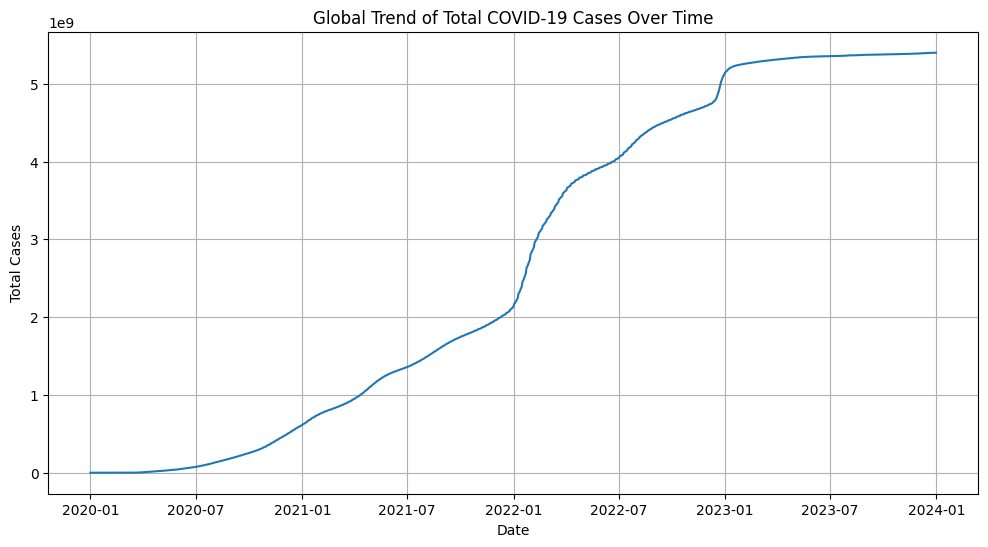

In [ ]:
# Aggregate total cases by date globally
global_cases_trend = filter_data.groupby('date')['total_cases'].sum().reset_index()

# Plot the trend of total cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=global_cases_trend, x='date', y='total_cases')
plt.title('Global Trend of Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.show()

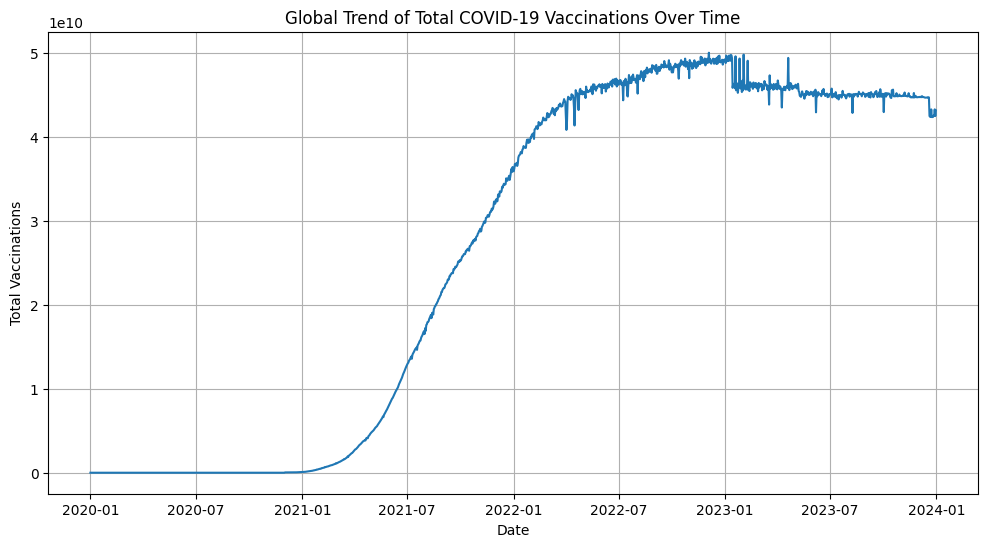

In [ ]:
# Aggregate total vaccinations by date globally, handling potential NaNs by summing
global_vaccinations_trend = filter_data.groupby('date')['total_vaccinations'].sum().reset_index()

# Plot the trend of total vaccinations over time
plt.figure(figsize=(12, 6))
# Use dropna to handle potential missing values at the start of the vaccination period
sns.lineplot(data=global_vaccinations_trend.dropna(subset=['total_vaccinations']), x='date', y='total_vaccinations')
plt.title('Global Trend of Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.grid(True)
plt.show()

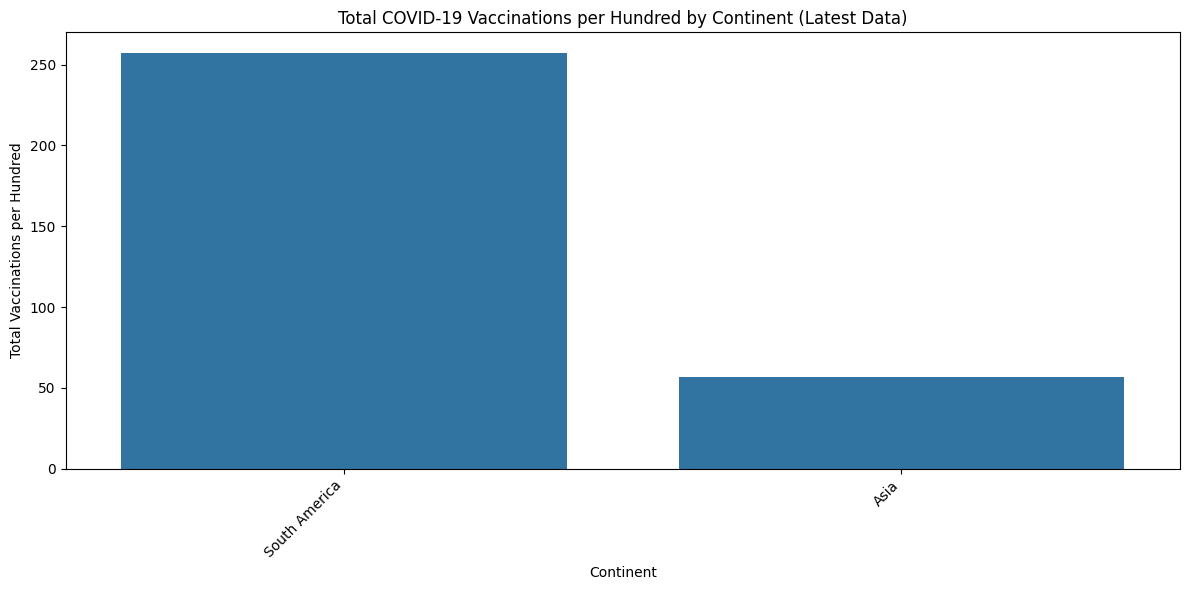

In [ ]:
# Get the latest data for each continent, focusing on vaccination data
latest_data_vaccines = filter_data.loc[filter_data.groupby('continent')['date'].idxmax()]

# Drop rows where 'total_vaccinations_per_hundred' is null before sorting and plotting
latest_data_vaccines_cleaned = latest_data_vaccines.dropna(subset=['total_vaccinations_per_hundred'])

# Sort by total_vaccinations_per_hundred for better visualization
latest_data_vaccines_sorted = latest_data_vaccines_cleaned.sort_values('total_vaccinations_per_hundred', ascending=False)

# Plot total vaccinations per hundred by continent
plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data_vaccines_sorted, x='continent', y='total_vaccinations_per_hundred')
plt.title('Total COVID-19 Vaccinations per Hundred by Continent (Latest Data)')
plt.xlabel('Continent')
plt.ylabel('Total Vaccinations per Hundred')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

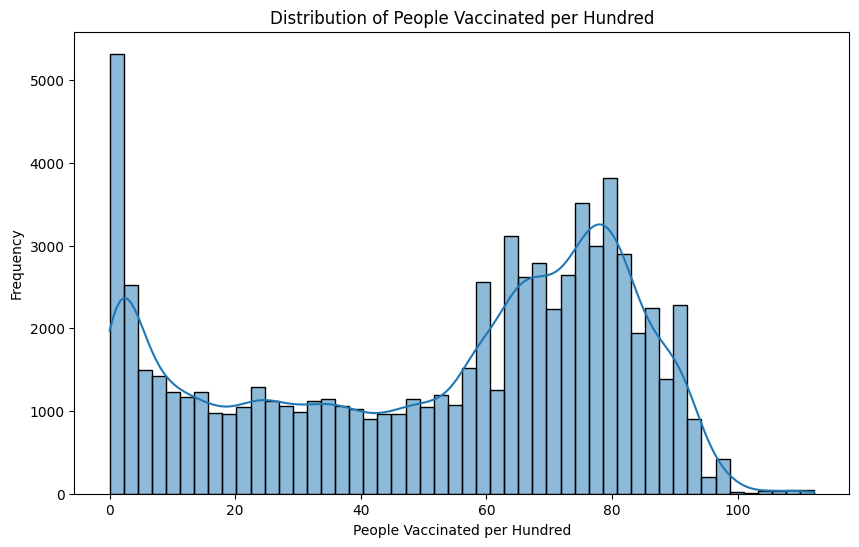

In [ ]:
# Plot the distribution of people vaccinated per hundred
plt.figure(figsize=(10, 6))
# Use dropna to handle missing values in this column
sns.histplot(data=filter_data.dropna(subset=['people_vaccinated_per_hundred']), x='people_vaccinated_per_hundred', bins=50, kde=True)
plt.title('Distribution of People Vaccinated per Hundred')
plt.xlabel('People Vaccinated per Hundred')
plt.ylabel('Frequency')
plt.show()

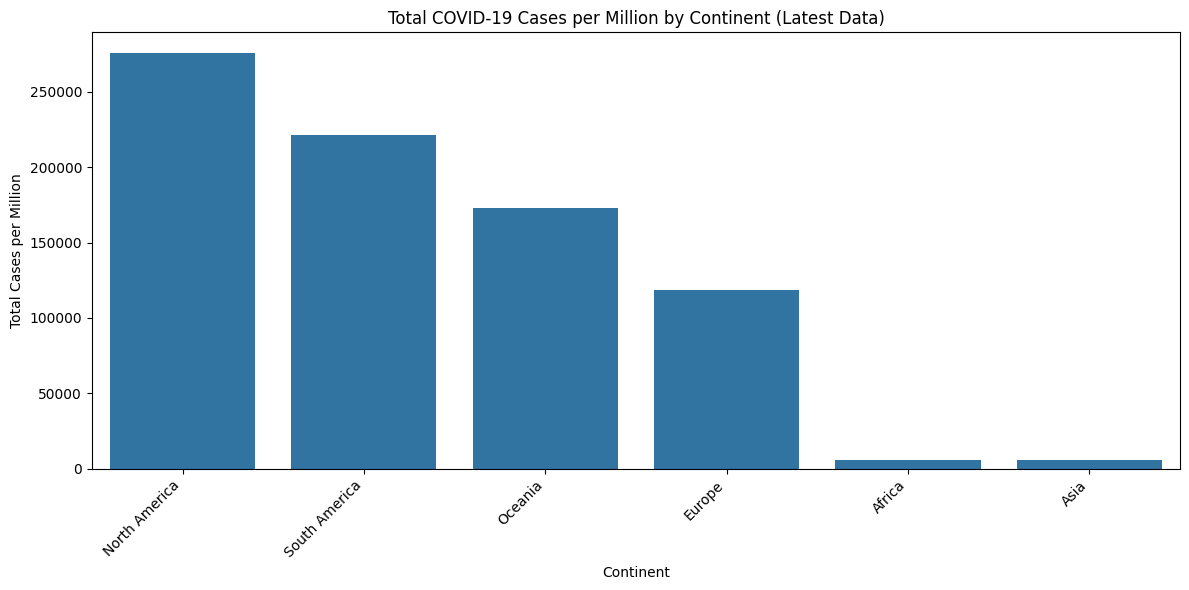

In [ ]:
# Get the latest data for each continent
latest_data = filter_data.loc[filter_data.groupby('continent')['date'].idxmax()]

# Sort by total_cases_per_million for better visualization
latest_data_sorted = latest_data.sort_values('total_cases_per_million', ascending=False)

# Plot total cases per million by continent
plt.figure(figsize=(12, 6))
sns.barplot(data=latest_data_sorted, x='continent', y='total_cases_per_million')
plt.title('Total COVID-19 Cases per Million by Continent (Latest Data)')
plt.xlabel('Continent')
plt.ylabel('Total Cases per Million')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

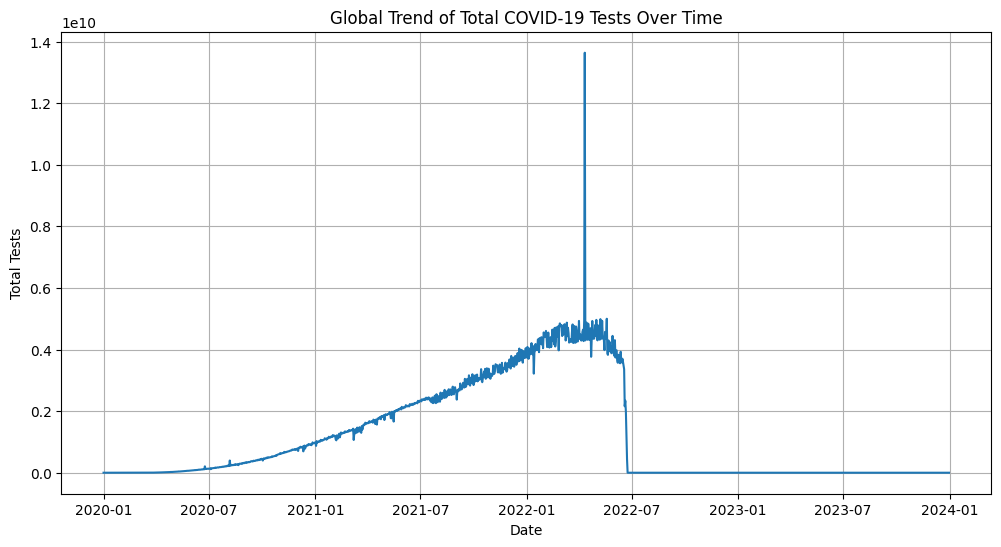

In [ ]:
# Aggregate total tests by date globally, handling potential NaNs by summing
global_tests_trend = filter_data.groupby('date')['total_tests'].sum().reset_index()

# Plot the trend of total tests over time
plt.figure(figsize=(12, 6))
# Use dropna to handle potential missing values
sns.lineplot(data=global_tests_trend.dropna(subset=['total_tests']), x='date', y='total_tests')
plt.title('Global Trend of Total COVID-19 Tests Over Time')
plt.xlabel('Date')
plt.ylabel('Total Tests')
plt.grid(True)
plt.show()

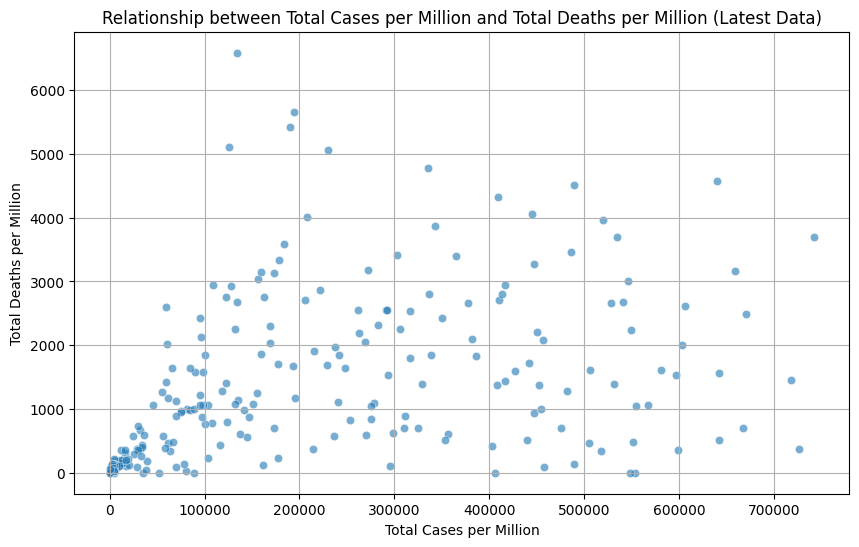

In [ ]:
# Ensure we have non-null values for both columns and get the latest data per country
latest_data_country = filter_data.loc[filter_data.groupby('country')['date'].idxmax()]
data_for_scatter_cases_deaths = latest_data_country.dropna(subset=['total_cases_per_million', 'total_deaths_per_million'])

# Plot the relationship between Total Cases per Million and Total Deaths per Million
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_for_scatter_cases_deaths, x='total_cases_per_million', y='total_deaths_per_million', alpha=0.6)
plt.title('Relationship between Total Cases per Million and Total Deaths per Million (Latest Data)')
plt.xlabel('Total Cases per Million')
plt.ylabel('Total Deaths per Million')
plt.grid(True)
plt.show()

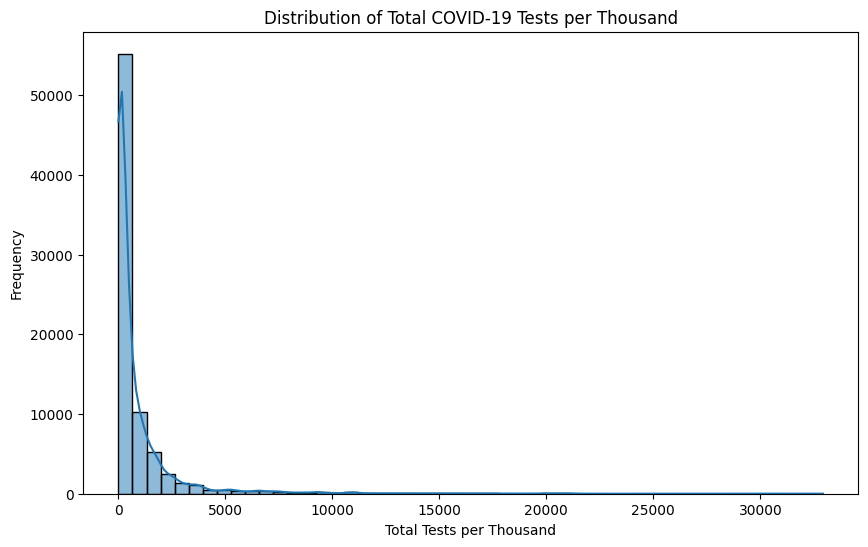

In [ ]:
# Plot the distribution of total tests per thousand
plt.figure(figsize=(10, 6))
# Use dropna to handle missing values in this column
sns.histplot(data=filter_data.dropna(subset=['total_tests_per_thousand']), x='total_tests_per_thousand', bins=50, kde=True)
plt.title('Distribution of Total COVID-19 Tests per Thousand')
plt.xlabel('Total Tests per Thousand')
plt.ylabel('Frequency')
plt.show()

# Conclusion

**Global Trends:**

Both total cases and total vaccinations show a clear increasing trend over time globally, reflecting the spread of the virus and the subsequent vaccination efforts.
Total tests also show an increasing trend, indicating ramped-up testing capabilities throughout the pandemic period.

**Continental Comparison (Latest Data):**

When comparing total cases per million across continents (using the latest data), there are significant variations, suggesting different levels of impact or reporting across regions.
Similarly, total vaccinations per hundred varies considerably by continent, highlighting disparities in vaccination rollout and coverage.
The latest reported new cases and new deaths by continent give us a snapshot of the current state of the pandemic's intensity across different parts of the world.

**Relationships between Metrics:**

The relationship between total cases per million and total deaths per million (using the latest data) generally shows a positive correlation, meaning countries with higher case rates tend to have higher death rates, although there's significant variation indicating other factors influence mortality.
The relationship between Human Development Index (HDI) and total cases per million also shows some patterns, suggesting a potential link between a country's development level and its reported case numbers. Further analysis would be needed to understand the nuances of this relationship.

**Distributions:**

The distribution of people vaccinated per hundred and total tests per thousand are often skewed, indicating that a few countries or regions might have significantly higher vaccination rates or testing rates compared to the majority.
Overall, the data provides a high-level view of the pandemic's progression, the differing impacts across continents, the efforts in testing and vaccination, and some potential correlations between health outcomes and development indicators.